In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import spacy
import re
import nltk
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
import string

In [6]:
import nltk
from nltk import word_tokenize,sent_tokenize

In [7]:
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras.layers import Embedding 
from keras.layers import Conv1D, GlobalMaxPooling1D, GlobalMaxPool1D
from keras.layers import LSTM, Bidirectional

In [8]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers

In [9]:
from tensorflow.keras.layers import TextVectorization

## Bags of words embedding

In [10]:
dt = pd.read_csv('train.csv',encoding ='utf-8')

In [11]:
#english x
x_p = dt.premise.values
x_h =  dt.hypothesis.values
#english y 
y = dt.label.values
# split train and test
x_train_p, x_test_p,x_train_h,x_test_h, y_train, y_test = train_test_split(x_p,x_h, y, test_size=0.3, random_state=100)

In [12]:
x_train = x_train_p +' '+x_train_h
x_train

array(['Υποθέτουμε μια άμεση γραμμική σχέση μεταξύ όγκου ανά κάτοικο και τεμαχίων ανά πιθανού Γνωρίζουμε πως δεν υπάρχει καμία δυνατή σύνδεση μεταξύ της ποσότητας ανά κάτοικο και κομματιών.',
       'Anstelle einer zentralisierten oder dezentralisierten CIO-Organisationen, führende Organisationen verwalten ihre Informationsressourcen durch eine Kombination solcher Strukturen. Organisationen verwalten ihre Informationsressourcen auf unterschiedlichen Wegen.',
       "and clean up is is uh is a joy uh a little soap and water and air dry them and you don't have to worry about that You don't need any soap for the clean up.",
       ...,
       'From here, many HIV researchers are putting their hopes on combining drug treatments with strategies that boost the immune system. Drug treatments combined with strategies that boost the immune system could be the solution to HIV.',
       'Thêm thời gian thông thường cần được thêm vào để phát triển kế hoạch hành động Họ thường cần thêm một năm để t

In [13]:
y_train

array([2, 0, 2, ..., 0, 1, 2], dtype=int64)

In [14]:
X_train_tok = [word_tokenize(sentence) for sentence in x_train]
X_train_tok = [[word.lower() for word in s]for s in X_train_tok]
X_train_tok = [[word for word in s if word.isalpha()]for s in X_train_tok]

In [15]:
text = []
for l in X_train_tok:
    for i in l:
        text.append(i)

In [16]:
text = set(text)
text1 =list(text)

In [17]:
# Model constants.
max_features = len(text1)+2
embedding_dim = 128
sequence_length = 100


def custom_slpit(input_data):
    return tf.strings.split(input_data)

vectorize_layer = TextVectorization(
    max_tokens=max_features,
    vocabulary = text1,
    output_mode="int",
    ngrams = None,
    output_sequence_length=sequence_length,
)
#vectorize_layer.adapt(x_train)

In [18]:
vectorize_layer.get_vocabulary()

['',
 '[UNK]',
 'облака',
 'التمييز',
 'compacta',
 'εντοπισθεί',
 'özellikle',
 'lottery',
 'acclaimed',
 'betrayal',
 'biết',
 'khác',
 'πολιτείες',
 'немски',
 'گالی',
 'заставит',
 'routinely',
 'kuombaomba',
 'random',
 'bawdy',
 'formal',
 'giuliana',
 'wachter',
 'отбор',
 'поставщикам',
 'σύντομα',
 'οπουδήποτε',
 'thoughts',
 'canım',
 'перешла',
 'directement',
 'großteil',
 'mjini',
 'πλησιέστερες',
 'похож',
 'χώρου',
 'veía',
 'regulars',
 'ibm',
 'храма',
 'überwachungsfotos',
 'votes',
 'passages',
 'قرش',
 'ہائے',
 'pig',
 'нижняя',
 'أجدادي',
 'пожертвования',
 'war',
 'metaxas',
 'чрез',
 'ruqawat',
 'heshima',
 'الخاصين',
 'παρέχει',
 'toán',
 'ہمدرد',
 'bilkul',
 'anc',
 'lóng',
 'البشرية',
 'принимал',
 'colenia',
 'всем',
 'ẩn',
 'cruzada',
 'superviviente',
 'ανά',
 'tính',
 'wollte',
 'أذهانهم',
 'port',
 'ceci',
 'sombra',
 'исторически',
 'понимает',
 'celtic',
 'değişen',
 'трябваше',
 'website',
 'getirmek',
 'vergeben',
 'wanapotembelea',
 'معاہدے',
 'elect

In [19]:
X_train_p = vectorize_layer(x_train_p)
X_test_p = vectorize_layer(x_test_p)
X_train_h = vectorize_layer(x_train_h)
X_test_h = vectorize_layer(x_test_h)

In [20]:
X_train = np.hstack((X_train_p,X_train_h))
X_test = np.hstack((X_test_p,X_test_h))

In [21]:
X_train.shape

(8484, 200)

In [22]:
# Convert y to OHE 
y_train = to_categorical(y_train, 3)
y_test  = to_categorical(y_test, 3)

In [23]:
# A integer input for vocab indices.
inputs = Input(shape=(200,), dtype="int64")

# Next, we add a layer to map those vocab indices into a space of dimensionality
# 'embedding_dim'.
x = Embedding(max_features, embedding_dim)(inputs)
x = Dropout(0.1)(x)

# Conv1D + global max pooling
x = Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = GlobalMaxPooling1D()(x)

# We add a vanilla hidden layer:
x = Dense(128, activation="relu")(x)
x = Dropout(0.1)(x)

# We project onto a single unit output layer, and squash it with a sigmoid:
x = layers.Dense(3, activation="softmax", name="predictions")(x)

model = keras.Model(inputs, outputs=x)

# Compile the model with binary crossentropy loss and an adam optimizer.
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
cnn = model.fit(X_train, y_train, epochs=3,validation_split=0.2)

Epoch 1/3
213/213 [==============================] - 18s 82ms/step - loss: 1.0989 - accuracy: 0.3308 - val_loss: 1.0989 - val_accuracy: 0.3424
Epoch 2/3
213/213 [==============================] - 16s 74ms/step - loss: 1.0239 - accuracy: 0.4730 - val_loss: 1.1365 - val_accuracy: 0.3630
Epoch 3/3
213/213 [==============================] - 16s 77ms/step - loss: 0.4880 - accuracy: 0.7967 - val_loss: 1.5699 - val_accuracy: 0.3524


In [25]:
cnn_pred = np.round(model.predict(X_test))

114/114 [==============================] - 1s 5ms/step


In [26]:
print('Accuracy %s' % accuracy_score(y_test, cnn_pred))
print('F1-score %s' % f1_score(y_test, cnn_pred, average=None))
print('Classification report:')
print(classification_report(y_test, cnn_pred))

Accuracy 0.2480748074807481
F1-score [0.35390653 0.20744986 0.25069638]
Classification report:
              precision    recall  f1-score   support

           0       0.32      0.40      0.35      1245
           1       0.31      0.16      0.21      1161
           2       0.40      0.18      0.25      1230

   micro avg       0.33      0.25      0.28      3636
   macro avg       0.34      0.25      0.27      3636
weighted avg       0.34      0.25      0.27      3636
 samples avg       0.25      0.25      0.25      3636



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
input = Input(shape=(200,), dtype="int64") 
x   =  Embedding(max_features, embedding_dim)(input)
#x   =  Dropout(0.2)(x)
x   =  Conv1D(100, 3, padding='valid',activation='relu', strides=1)(x)
x   =  GlobalMaxPooling1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(32, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(3, activation="softmax")(x)

model1 = Model(inputs=input, outputs=x)
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [28]:
cnn1 = model1.fit(X_train, y_train, epochs=3,validation_split=0.2)

Epoch 1/3
213/213 [==============================] - 15s 69ms/step - loss: 1.0996 - accuracy: 0.3351 - val_loss: 1.0985 - val_accuracy: 0.3259
Epoch 2/3
213/213 [==============================] - 15s 72ms/step - loss: 1.0692 - accuracy: 0.4310 - val_loss: 1.1024 - val_accuracy: 0.3524
Epoch 3/3
213/213 [==============================] - 14s 67ms/step - loss: 0.8178 - accuracy: 0.6461 - val_loss: 1.3025 - val_accuracy: 0.3324


In [29]:
cnn_pred1 = np.round(model1.predict(X_test))

114/114 [==============================] - 1s 4ms/step


In [30]:
print('Accuracy %s' % accuracy_score(y_test, cnn_pred1))
print('F1-score %s' % f1_score(y_test, cnn_pred1,average=None,zero_division = 0))
print('Classification report:')
print(classification_report(y_test, cnn_pred1))

Accuracy 0.17546754675467546
F1-score [0.17761429 0.20800832 0.26792829]
Classification report:
              precision    recall  f1-score   support

           0       0.26      0.14      0.18      1245
           1       0.26      0.17      0.21      1161
           2       0.35      0.22      0.27      1230

   micro avg       0.29      0.18      0.22      3636
   macro avg       0.29      0.18      0.22      3636
weighted avg       0.29      0.18      0.22      3636
 samples avg       0.18      0.18      0.18      3636



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LSTM

In [31]:
input = Input(shape=(200, )) 
x   =  Embedding(max_features, embedding_dim)(input)
x   =  LSTM(200, return_sequences=True,name='lstm_layer')(x)
x   =  GlobalMaxPool1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(3, activation="softmax")(x)

In [32]:
model_l = Model(inputs=input, outputs=x)
model_l.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
lstm = model_l.fit(X_train, y_train, epochs=3,validation_split=0.2)

Epoch 1/3
213/213 [==============================] - 50s 227ms/step - loss: 1.0990 - accuracy: 0.3387 - val_loss: 1.0970 - val_accuracy: 0.3547
Epoch 2/3
213/213 [==============================] - 47s 220ms/step - loss: 1.0686 - accuracy: 0.4196 - val_loss: 1.0768 - val_accuracy: 0.4013
Epoch 3/3
213/213 [==============================] - 47s 222ms/step - loss: 0.8150 - accuracy: 0.6324 - val_loss: 1.2987 - val_accuracy: 0.3477


In [34]:
lstm_pred = np.round(model_l.predict(X_test))

114/114 [==============================] - 6s 47ms/step


In [35]:
print('Accuracy %s' % accuracy_score(y_test, lstm_pred))
print('F1-score %s' % f1_score(y_test, lstm_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstm_pred))

Accuracy 0.20132013201320131
F1-score [0.19047619 0.25909317 0.30689476]
Classification report:
              precision    recall  f1-score   support

           0       0.29      0.14      0.19      1245
           1       0.31      0.22      0.26      1161
           2       0.42      0.24      0.31      1230

   micro avg       0.34      0.20      0.25      3636
   macro avg       0.34      0.20      0.25      3636
weighted avg       0.34      0.20      0.25      3636
 samples avg       0.20      0.20      0.20      3636



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
inputs = Input(shape=(200,))
x = Embedding(max_features, embedding_dim)(inputs)
# Add 2 bidirectional LSTMs
x = Bidirectional(LSTM(200, return_sequences=True))(x)
x = Bidirectional(LSTM(64))(x)
#x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
# Add a classifier
x = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs=x)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [37]:
lstm = model.fit(X_train, y_train, epochs=5,validation_split=0.2)

Epoch 1/5
213/213 [==============================] - 209s 961ms/step - loss: 1.0992 - accuracy: 0.3409 - val_loss: 1.0976 - val_accuracy: 0.3565
Epoch 2/5
213/213 [==============================] - 214s 1s/step - loss: 1.0929 - accuracy: 0.3832 - val_loss: 1.1307 - val_accuracy: 0.2675
Epoch 3/5
213/213 [==============================] - 219s 1s/step - loss: 0.9114 - accuracy: 0.5679 - val_loss: 1.3042 - val_accuracy: 0.2528
Epoch 4/5
213/213 [==============================] - 228s 1s/step - loss: 0.6617 - accuracy: 0.6787 - val_loss: 1.8340 - val_accuracy: 0.2280
Epoch 5/5
213/213 [==============================] - 220s 1s/step - loss: 0.5287 - accuracy: 0.7043 - val_loss: 2.2959 - val_accuracy: 0.2451


In [38]:
lstm_pred = np.round(model.predict(X_test))

114/114 [==============================] - 23s 189ms/step


In [39]:
print('Accuracy %s' % accuracy_score(y_test, lstm_pred))
print('F1-score %s' % f1_score(y_test, lstm_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstm_pred))

Accuracy 0.1256875687568757
F1-score [0.16412776 0.17239556 0.13389562]
Classification report:
              precision    recall  f1-score   support

           0       0.21      0.13      0.16      1245
           1       0.22      0.14      0.17      1161
           2       0.19      0.10      0.13      1230

   micro avg       0.21      0.13      0.16      3636
   macro avg       0.21      0.13      0.16      3636
weighted avg       0.21      0.13      0.16      3636
 samples avg       0.13      0.13      0.13      3636



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


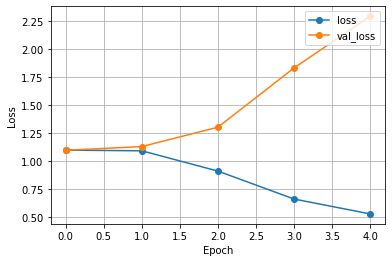

In [40]:
plt.plot(lstm.history['loss'], label='loss', marker = 'o')
plt.plot(lstm.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')